> Все функции я потом добавлю в финальную тетрадку (если понадобятся) - например, reduce_mem_usage, splitting_pandas_to_pool

In [1]:
#Добавление snippets в path
from sys import path
path.append('D:\\jupiter\\snippets')

import itertools as it

import pandas as pd
import numpy as np
from scipy import signal

from table import reduce_mem_usage

%pylab inline
plt.style.use('bmh')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# def load_all_frame() -> pd.DataFrame:
#     """Загрузка всех данных с конкатенацией по контрагенту
#     Return:
#         data: pd.DataFrame - датафрейм со всеми данными
#     """
    
    

In [3]:
# data = pd.merge(data1, data2, on='Наименование ДП', suffixes = ('', '_y'))
# data = data.drop(columns=[x for x in data.columns if "_y" in x])
# data = pd.merge(data, data3, on='Наименование ДП', suffixes = ('', '_y'))
# data = data.drop(columns=[x for x in data.columns if "_y" in x])

In [4]:
# data1 = pd.read_csv("./data/agents2019.csv")
# data2 = pd.read_csv("./data/agents2020.csv")
# data3 = pd.read_csv("./data/agents2021.csv")

# 1. 2019 года (agents2019.csv) 

## load data

In [5]:
data = pd.read_csv("./data/agents2019.csv")
data = data.drop(columns=["Unnamed: 0"])
data = reduce_mem_usage(data, verbose=True)
data.head()

Mem. usage decreased to  0.11 Mb (51.8% reduction)


,Наименование ДП,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2016, Основные средства , RUB",...,"2018, Выручка, RUB","2016, Себестоимость продаж, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB"
0,0,0,0.0,0,0.000000,0,2895541.50,6.245860e+06,9.050955e+06,1.889724e+09,...,3.703952e+10,2.156815e+10,3.335443e+10,3.438313e+10,3.179697e+09,6.167667e+09,7.461828e+08,3.280355e+09,6.200120e+09,8.716191e+08
1,1,0,0.0,0,0.000000,0,0.00,3.885350e+04,3.439491e+04,1.448108e+08,...,5.434306e+08,2.056815e+08,2.055325e+08,4.169796e+08,1.212357e+07,6.944586e+06,4.480064e+07,1.630064e+07,1.109172e+07,5.135732e+07
2,2,7,5.5,1,132825.296875,2,2468152.75,1.288026e+07,8.694904e+06,9.698064e+08,...,2.592420e+09,2.038076e+09,2.178598e+09,2.316724e+09,5.026662e+08,3.644229e+08,8.552994e+07,4.148586e+08,1.611318e+08,-9.298981e+07
3,3,0,0.0,0,0.000000,0,0.00,0.000000e+00,0.000000e+00,8.874127e+09,...,2.165799e+10,1.014149e+10,1.063542e+10,1.171315e+10,4.100857e+09,4.481281e+09,6.840634e+09,4.903117e+09,5.186553e+09,7.869977e+09
4,4,2,2.0,0,0.000000,2,550318.50,5.210191e+05,4.490446e+05,2.633161e+10,...,8.611910e+10,1.950167e+10,2.340042e+10,2.652547e+10,7.163980e+10,3.799862e+10,4.593606e+10,2.338912e+10,3.727985e+10,5.307524e+10


## EDA
1. Общая статистика 
2. Распределения
3. Синтетические признаки

In [6]:
print("=" * 5 + " Общая статистика контрагентов " + "=" * 5)
print(f"{'Всего данных':30s}:{len(data)}")
print(f"{'Уникальных контрагентов':30s}:{data['Наименование ДП'].nunique()}")
print(f"{'Среднее значение макс. ПДЗ':30s}:{data['Макс. ПДЗ за 2019 год, дней'].mean()}")
print(f"{'Медианное значение макс. ПДЗ':30s}:{data['Макс. ПДЗ за 2019 год, дней'].median()}")

===== Общая статистика контрагентов =====
Всего данных                  :531
Уникальных контрагентов       :531
Среднее значение макс. ПДЗ    :27.74387947269303
Медианное значение макс. ПДЗ  :3.0


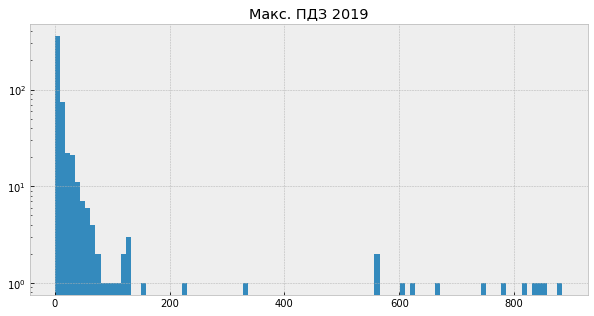

In [7]:
fig, ax = plt.subplots(1, figsize=(10,5))
data["Макс. ПДЗ за 2019 год, дней"].hist(bins=100, ax=ax)
ax.set_title("Макс. ПДЗ 2019")
ax.set_yscale("log")
plt.show()

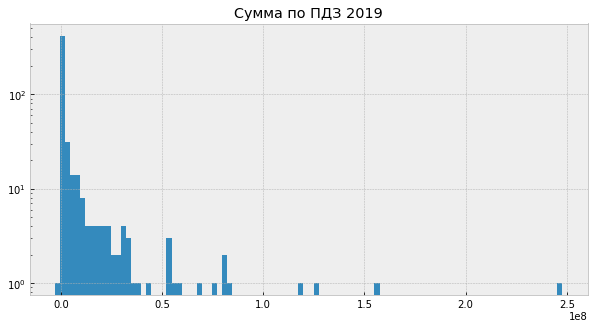

In [8]:
fig, ax = plt.subplots(1, figsize=(10,5))
data["Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб."].hist(bins=100, ax=ax)
ax.set_title("Сумма по ПДЗ 2019")
ax.set_yscale("log")
plt.show()

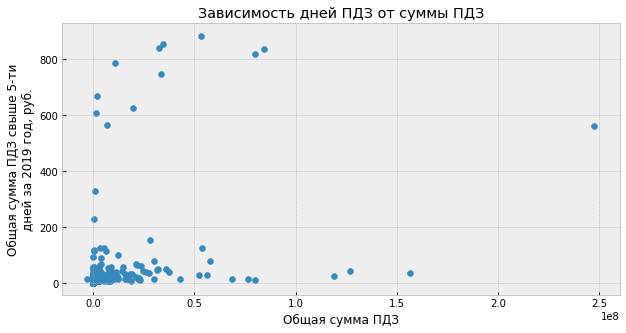

In [9]:
fig, ax = plt.subplots(1, figsize=(10,5))
plt.scatter(data["Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб."], data["Макс. ПДЗ за 2019 год, дней"])
ax.set_title("Зависимость дней ПДЗ от суммы ПДЗ")
ax.set_ylabel("Общая сумма ПДЗ свыше 5-ти\nдней за 2019 год, руб.")
ax.set_xlabel("Общая сумма ПДЗ")
#ax.set_yscale("log")
plt.show()

> Отрицаетельная задолжность?! Ошибка? Правим)

In [10]:
data[data["Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб."] < 0] = data[data["Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб."] < 0] * -1
data[data["Макс. ПДЗ за 2019 год, дней"] < 0] = data[data["Макс. ПДЗ за 2019 год, дней"] < 0] * -1

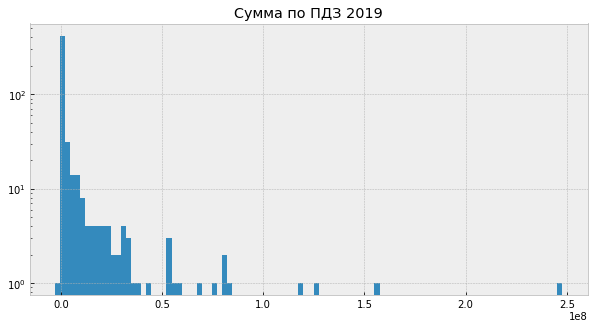

In [11]:
fig, ax = plt.subplots(1, figsize=(10,5))
data["Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб."].hist(bins=100, ax=ax)
ax.set_title("Сумма по ПДЗ 2019")
ax.set_yscale("log")
plt.show()

## Значимость признаков

>Тупая модель для значимости признаков

In [12]:
print(f"{'Признак':50s}|Среднее значение\n{'-' * 50}|{'-' * 20}")
for i in data.columns:
    print(f"{i:50s}|{data[i].mean():.3f}")

Признак                                           |Среднее значение
--------------------------------------------------|--------------------
Наименование ДП                                   |265.000
Макс. ПДЗ за 2019 год, дней                       |27.744
Сред. ПДЗ за 2019 год, дней                       |7.677
Кол-во просрочек свыше 5-ти дней за 2019 год, шт. |6.492
Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб. |4825705.500
Кол-во раз ПДЗ за 2019 год, шт.                   |17.951
2016, Нематериальные активы, RUB                  |25818924.000
2017, Нематериальные активы, RUB                  |36000980.000
2018, Нематериальные активы, RUB                  |46722020.000
2016, Основные средства , RUB                     |5294545920.000
2017, Основные средства , RUB                     |6206710784.000
2018, Основные средства , RUB                     |7080918016.000
2016, Внеоборотные активы, RUB                    |7688534016.000
2017, Внеоборотные активы, RUB                    |8

> По 2019 датасету все признаки числовые, строим catboost regressor и вычисляем значимость признаков, датасет бъем 80 / 20;

> Среднее и максимальное и все, что связано с ПДЗ выкидываем и добавляем их в таргет, если по ним значимость $\pm$ одинаковая, то будем предполагать, что эти признаки важны

> Еще момент - понял, что id ДП тоже бы надо откинуть - он много вносит в итоговое решение, но по сути своей не информативен

### Синтетические признаки


**Когорты компаний?**

0. Бинарная классификация (0 - не было ПДЗ, 1 - была)
1. Уставный капитал 
    * добавляем категорию "нет сведений о уставном капитале" (`no_init_cap`);
    * добавляем значение динамики уставного капитала (`init_cap_dyn`) - регрессия по историческим данным
    * тренд по всем значениям по подобию `no_init_cap` и `no_init_cap` - они будут переопределены в конце раздела для однообразия

**Ниже [до следующей черты] подробный разбор добавления признаков**

------------------------

In [13]:
init_cap = ("2016, Уставный капитал , RUB", "2017, Уставный капитал , RUB", "2018, Уставный капитал , RUB")
print(f"Количество \'0\' в установочном капитале\n2016: {len(data[data[init_cap[0]] == 0])}\n2017: {len(data[data[init_cap[1]] == 0])}\
\n2018: {len(data[data[init_cap[2]] == 0])}")

Количество '0' в установочном капитале
2016: 131
2017: 123
2018: 73


In [14]:
print("Количество \'0\' в парах и тройке годов:")
temp_names = tuple(it.combinations(init_cap, r=2))
couter = {"2016,2017": 0, "2016,2018": 0, "2017,2018": 0, "2016-2018": 0}
for idx in range(len(data)):
    if data.iloc[idx][temp_names[0][0]] == 0 and data.iloc[idx][temp_names[0][1]] == 0:
        couter["2016,2017"] += 1
    if data.iloc[idx][temp_names[1][0]] == 0 and data.iloc[idx][temp_names[1][1]] == 0:
        couter["2016,2018"] += 1
    if data.iloc[idx][temp_names[2][0]] == 0 and data.iloc[idx][temp_names[2][1]] == 0:
        couter["2017,2018"] += 1
    if data.iloc[idx][init_cap[0]] == 0 and data.iloc[idx][init_cap[1]] == 0 and data.iloc[idx][init_cap[2]] == 0:
        couter["2016-2018"] += 1
for k, v in couter.items():
    print(f"{k}: {v}")
del couter

Количество '0' в парах и тройке годов:
2016,2017: 107
2016,2018: 62
2017,2018: 69
2016-2018: 62


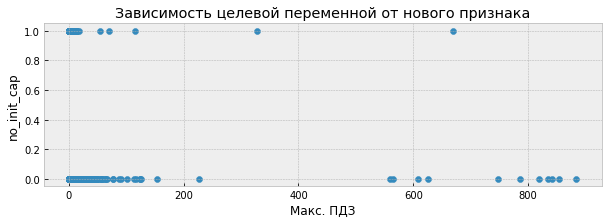

In [15]:
data["no_init_cap"] = 0
data.at[(data[init_cap[0]] == 0) & (data[init_cap[1]] == 0) & (data[init_cap[2]] == 0), "no_init_cap"] = 1
plt.figure(figsize=(10, 3))
plt.scatter(data["Макс. ПДЗ за 2019 год, дней"], data["no_init_cap"])
plt.title("Зависимость целевой переменной от нового признака")
plt.xlabel("Макс. ПДЗ")
plt.ylabel("no_init_cap")
plt.show()

In [16]:
for pair in temp_names:
    temp = data[(data[pair[0]] != 0) & (data[pair[1]] != 0)][pair[0]] - data[(data[pair[0]] != 0) & (data[pair[1]] != 0)][pair[1]]
    if sum(temp > 0):
        print(f"Изменение {pair[0].split(',')[0]},{pair[1].split(',')[0]}: [средняя разница {temp.mean():.1f}] строки {tuple(temp[temp > 0].index)}")

Изменение 2016,2017: [средняя разница -27965378.0] строки (85, 250)
Изменение 2016,2018: [средняя разница -33332784.0] строки (28, 54, 85, 250, 351, 365, 456)
Изменение 2017,2018: [средняя разница -10463125.0] строки (28, 54, 351, 365, 455, 456)


In [17]:
def trendline(data, order=1):
    coeffs = np.polyfit([x for x in range(len(data))], data, order)
    slope = coeffs[-2]
    return float(slope)

In [18]:
data["init_cap_dyn"] = 0
for idx in data[(data[init_cap[0]] != 0) & (data[init_cap[1]] != 0) & (data[init_cap[2]] != 0)].index:
    data.at[idx, "init_cap_dyn"] = trendline([data.loc[idx, init_cap[0]], data.loc[idx, init_cap[1]], data.loc[idx, init_cap[2]]])

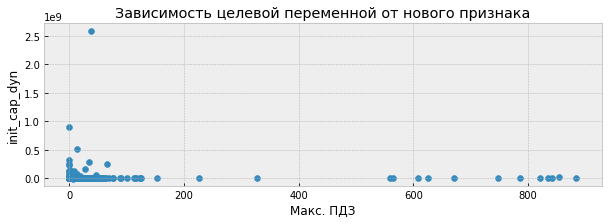

In [19]:
plt.figure(figsize=(10, 3))
plt.scatter(data["Макс. ПДЗ за 2019 год, дней"], data["init_cap_dyn"])
plt.title("Зависимость целевой переменной от нового признака")
plt.xlabel("Макс. ПДЗ")
plt.ylabel("init_cap_dyn")
plt.show()

------------------------------

**! столбцы `no_init_cap` и `init_cap_dyn` удаляются для однообразия!**

In [20]:
data = pd.read_csv("./data/agents2019.csv")
data = data.drop(columns=["Unnamed: 0"])
data = reduce_mem_usage(data, verbose=True)
data.head()

Mem. usage decreased to  0.11 Mb (51.8% reduction)


,Наименование ДП,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2016, Основные средства , RUB",...,"2018, Выручка, RUB","2016, Себестоимость продаж, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB"
0,0,0,0.0,0,0.000000,0,2895541.50,6.245860e+06,9.050955e+06,1.889724e+09,...,3.703952e+10,2.156815e+10,3.335443e+10,3.438313e+10,3.179697e+09,6.167667e+09,7.461828e+08,3.280355e+09,6.200120e+09,8.716191e+08
1,1,0,0.0,0,0.000000,0,0.00,3.885350e+04,3.439491e+04,1.448108e+08,...,5.434306e+08,2.056815e+08,2.055325e+08,4.169796e+08,1.212357e+07,6.944586e+06,4.480064e+07,1.630064e+07,1.109172e+07,5.135732e+07
2,2,7,5.5,1,132825.296875,2,2468152.75,1.288026e+07,8.694904e+06,9.698064e+08,...,2.592420e+09,2.038076e+09,2.178598e+09,2.316724e+09,5.026662e+08,3.644229e+08,8.552994e+07,4.148586e+08,1.611318e+08,-9.298981e+07
3,3,0,0.0,0,0.000000,0,0.00,0.000000e+00,0.000000e+00,8.874127e+09,...,2.165799e+10,1.014149e+10,1.063542e+10,1.171315e+10,4.100857e+09,4.481281e+09,6.840634e+09,4.903117e+09,5.186553e+09,7.869977e+09
4,4,2,2.0,0,0.000000,2,550318.50,5.210191e+05,4.490446e+05,2.633161e+10,...,8.611910e+10,1.950167e+10,2.340042e+10,2.652547e+10,7.163980e+10,3.799862e+10,4.593606e+10,2.338912e+10,3.727985e+10,5.307524e+10


In [21]:
ts_features = {}
for feature in data.columns:
    if feature[:2] == "20" and feature[6:] not in ts_features.keys():
        ts_features[feature[6:]] = []

for feature in data.columns:
    if feature[6:] in ts_features.keys():
        ts_features[feature[6:]].append(feature[:4])

# Сортировка, если перепутана темпоральность
for key, value in ts_features.items():
    ts_features[key] = sort(value)
        
print(f"Признаки с глубиной по времени\n{'признак':45s}|доступные годы\n{'-' * 45}|{'-' * 20}")
for key, value in ts_features.items():
    print(f"{key:45s}|{', '.join(value)}")

Признаки с глубиной по времени
признак                                      |доступные годы
---------------------------------------------|--------------------
Нематериальные активы, RUB                   |2016, 2017, 2018
Основные средства , RUB                      |2016, 2017, 2018
Внеоборотные активы, RUB                     |2016, 2017, 2018
Дебиторская задолженность, RUB               |2016, 2017, 2018
Оборотные активы, RUB                        |2016, 2017, 2018
Уставный капитал , RUB                       |2016, 2017, 2018
Капитал и резервы, RUB                       |2016, 2017, 2018
Заёмные средства (долгосрочные), RUB         |2016, 2017, 2018
Долгосрочные обязательства, RUB              |2016, 2017, 2018
Заёмные средства (краткосрочные), RUB        |2016, 2017, 2018
Кредиторская задолженность, RUB              |2016, 2017, 2018
Краткосрочные обязательства, RUB             |2016, 2017, 2018
Выручка, RUB                                 |2016, 2017, 2018
Себестоимость продаж, 

In [22]:
def regressor_on_feature(data: pd.DataFrame, cols: list, new_name: str, suffix: str="_reg", cat_suffix: str="_cat") -> pd.DataFrame:
    """Построение регрессии на основе секции выше: если есть строки со всеми нулями - добавление категориального признака, построение тренда"""
    
    triplets = data[(data[cols[0]] == 0) & (data[cols[1]] == 0) & (data[cols[2]] == 0)]
    print(f"Количество троек с \'0\': {len(triplets)}, ", end=" ")
    print(f"Добавление категорильной переменной \'{new_name + cat_suffix}\'")
    data[new_name + cat_suffix] = 0
    data.at[triplets.index, new_name + cat_suffix] = 1
    data[new_name + cat_suffix] = data[new_name + cat_suffix].astype(int)
        
    data[new_name + suffix] = 0
    for idx in data[(data[cols[0]] != 0) & (data[cols[1]] != 0) & (data[cols[2]] != 0)].index:
        data.at[idx, new_name + suffix] = trendline([data.loc[idx, cols[0]], data.loc[idx, cols[1]], data.loc[idx, cols[2]]])
    return data

In [23]:
# Добавление признаков в датафрейм
for idx, (key, value) in enumerate(ts_features.items()):
    print(f"Обработка \'{key}\':", end="\n   ")
    data = regressor_on_feature(data, [f"{value[0]}, {key}", f"{value[1]}, {key}", f"{value[2]}, {key}"], key)

Обработка 'Нематериальные активы, RUB':
   Количество троек с '0': 344,  Добавление категорильной переменной 'Нематериальные активы, RUB_cat'
Обработка 'Основные средства , RUB':
   Количество троек с '0': 44,  Добавление категорильной переменной 'Основные средства , RUB_cat'
Обработка 'Внеоборотные активы, RUB':
   Количество троек с '0': 37,  Добавление категорильной переменной 'Внеоборотные активы, RUB_cat'
Обработка 'Дебиторская задолженность, RUB':
   Количество троек с '0': 18,  Добавление категорильной переменной 'Дебиторская задолженность, RUB_cat'
Обработка 'Оборотные активы, RUB':
   Количество троек с '0': 18,  Добавление категорильной переменной 'Оборотные активы, RUB_cat'
Обработка 'Уставный капитал , RUB':
   Количество троек с '0': 62,  Добавление категорильной переменной 'Уставный капитал , RUB_cat'
Обработка 'Капитал и резервы, RUB':
   Количество троек с '0': 18,  Добавление категорильной переменной 'Капитал и резервы, RUB_cat'
Обработка 'Заёмные средства (долгосрочны

In [24]:
data.head()

,Наименование ДП,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2016, Основные средства , RUB",...,"Краткосрочные обязательства, RUB_cat","Краткосрочные обязательства, RUB_reg","Выручка, RUB_cat","Выручка, RUB_reg","Себестоимость продаж, RUB_cat","Себестоимость продаж, RUB_reg","Прибыль (убыток) до налогообложения , RUB_cat","Прибыль (убыток) до налогообложения , RUB_reg","Прибыль (убыток) от продажи, RUB_cat","Прибыль (убыток) от продажи, RUB_reg"
0,0,0,0.0,0,0.000000,0,2895541.50,6.245860e+06,9.050955e+06,1.889724e+09,...,0,895931135,0,5181271039,0,6407492608,0,-1216757055,0,-1204368095
1,1,0,0.0,0,0.000000,0,0.00,3.885350e+04,3.439491e+04,1.448108e+08,...,0,55421657,0,143970391,0,105649039,0,16338534,0,17528343
2,2,7,5.5,1,132825.296875,2,2468152.75,1.288026e+07,8.694904e+06,9.698064e+08,...,0,45493951,0,-97078399,0,139324224,0,-208568152,0,-253924200
3,3,0,0.0,0,0.000000,0,0.00,0.000000e+00,0.000000e+00,8.874127e+09,...,0,738942976,0,2381392895,0,785831935,0,1369888895,0,1483430143
4,4,2,2.0,0,0.000000,2,550318.50,5.210191e+05,4.490446e+05,2.633161e+10,...,0,-11745087488,0,19474878464,0,3511898111,0,-12851869696,0,14843060223


### Добавление макроэкономики

1. Индексы производства по отдельным видам экономической деятельности ОКВЭД2 Российской Федерации (на 3 года назад 2018, 2017, 2016)
    * Производство металлургическое
    * Производство стальных труб, полых профилей и фитингов
    * Производство прочих стальных изделий первичной обработкой
    * Производство готовых металлических изделий, кроме машин и оборудования
    * Производство машин и оборудования, не включенных в другие группировки
2. Курс USD/RUB ЦБ РФ
    * На 1 января года
    * Максимальный за год
    * Минимальный за год

In [25]:
addition_data = {
    "metallurgical_production_index" : [99.7, 100.1, 101.7],
    "manufacture_of_steel_pipes" : [95.3, 106.3, 103.2],
    "manufacture_of_other_steel_products" : [104.9, 106.1, 102.7],
    "final_metal_products" : [112.7, 103.4, 101.3],
    "machines_products" : [101.5, 106.8, 99.4],
    "usd_rub_init" : [72.92, 59.89, 57.04],
    "usd_rub_min" : [60.27, 55.84, 57.67],
    "usd_rub_max" : [83.59, 60.75, 69.97]
}

In [26]:
for key, value in addition_data.items():
    for year, item_year in enumerate(value, start=2016):
        data[key + "_" + str(year)] = item_year

In [27]:
data

,Наименование ДП,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2016, Основные средства , RUB",...,machines_products_2018,usd_rub_init_2016,usd_rub_init_2017,usd_rub_init_2018,usd_rub_min_2016,usd_rub_min_2017,usd_rub_min_2018,usd_rub_max_2016,usd_rub_max_2017,usd_rub_max_2018
0,0,0,0.0,0,0.000000,0,2.895542e+06,6.245860e+06,9.050955e+06,1.889724e+09,...,99.4,72.92,59.89,57.04,60.27,55.84,57.67,83.59,60.75,69.97
1,1,0,0.0,0,0.000000,0,0.000000e+00,3.885350e+04,3.439491e+04,1.448108e+08,...,99.4,72.92,59.89,57.04,60.27,55.84,57.67,83.59,60.75,69.97
2,2,7,5.5,1,132825.296875,2,2.468153e+06,1.288026e+07,8.694904e+06,9.698064e+08,...,99.4,72.92,59.89,57.04,60.27,55.84,57.67,83.59,60.75,69.97
3,3,0,0.0,0,0.000000,0,0.000000e+00,0.000000e+00,0.000000e+00,8.874127e+09,...,99.4,72.92,59.89,57.04,60.27,55.84,57.67,83.59,60.75,69.97
4,4,2,2.0,0,0.000000,2,5.503185e+05,5.210191e+05,4.490446e+05,2.633161e+10,...,99.4,72.92,59.89,57.04,60.27,55.84,57.67,83.59,60.75,69.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,526,0,0.0,0,0.000000,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,99.4,72.92,59.89,57.04,60.27,55.84,57.67,83.59,60.75,69.97
527,527,0,0.0,0,0.000000,0,4.904459e+04,3.375796e+04,1.847134e+04,1.633268e+08,...,99.4,72.92,59.89,57.04,60.27,55.84,57.67,83.59,60.75,69.97
528,528,0,0.0,0,0.000000,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,99.4,72.92,59.89,57.04,60.27,55.84,57.67,83.59,60.75,69.97
529,529,0,0.0,0,0.000000,0,0.000000e+00,0.000000e+00,0.000000e+00,1.160127e+07,...,99.4,72.92,59.89,57.04,60.27,55.84,57.67,83.59,60.75,69.97


### Преобразование к задаче классификации

1. Бинарный случай
|Класс|Критерий|
|---|---|
|0| $==0$|
|1| $>0$|

In [28]:
from cat_boost import splitting_pandas_to_pool
from catboost import CatBoostClassifier

In [32]:
# перезагрузка данных
targets = [
    "Макс. ПДЗ за 2019 год, дней", "Сред. ПДЗ за 2019 год, дней", "Кол-во просрочек свыше 5-ти дней за 2019 год, шт.", 
    "Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.", "Кол-во раз ПДЗ за 2019 год, шт."
]
NUM_COLS = [x for x in data.drop(columns=targets + ["Наименование ДП"]).columns if "_cat" not in x]
CAT_COLS = [x for x in data.drop(columns=targets + ["Наименование ДП"]).columns if "_cat" in x]

> Основные параметры

In [42]:
ROUND_EPOCHS = 10
FINAL_EPOCHS = 1000
GS_ITERS = 100

In [34]:
grid_search_res = {}
for i in (0, 5, 10):
    print(f"Поиск по сетке для порога {i}, признак \'Макс. ПДЗ за 2019 год, дней\'")
    data["target"] = (data["Макс. ПДЗ за 2019 год, дней"] > i).astype(int)
    f = open(f"./logs/209_gs_cb_{i}.log", "w")
    model = CatBoostClassifier(
        iterations=GS_ITERS,
        early_stopping_rounds=ROUND_EPOCHS,
        grow_policy = 'Depthwise',
        depth=8,
        loss_function='CrossEntropy',
        random_state=42,
        l2_leaf_reg = 1,
        learning_rate=0.03,
        eval_metric='CrossEntropy',
        task_type="GPU",
        silent=True,
    )

    params = {'l2_leaf_reg':[0.8, 1,],
              'learning_rate': [0.01,0.5,0.1],
              'depth':[10,12],
              'border_count':[128,64,256],
              'max_ctr_complexity': [4,6,8,10]
             }

    grid_search_res[f"target_{i}"] = model.grid_search(
        params, data.drop(columns=targets + ["Наименование ДП"]).reindex(columns = sorted(list(data.columns))), data["target"], train_size=0.8, plot=False, verbose=False, log_cout=f
    )["params"]

    f.close()
    print()

Поиск по сетке для порога 0, признак 'Макс. ПДЗ за 2019 год, дней'

Поиск по сетке для порога 5, признак 'Макс. ПДЗ за 2019 год, дней'

Поиск по сетке для порога 10, признак 'Макс. ПДЗ за 2019 год, дней'



> Учим лучшие классификаторы

In [35]:
def get_train_val_idx(data) -> tuple:
    all_idx = [x for x in range(len(data))]
    train_idx = np.random.choice(all_idx, int(len(data) * .85), replace=False).tolist()
    val_idx = list(set(all_idx) - set(train_idx))
    return train_idx, val_idx

In [43]:
best_models = {}
train_idx = {}
val_idx = {}
for i in (0, 5, 10):
    data["target"] = (data["Макс. ПДЗ за 2019 год, дней"] > i).astype(int)
    train_idx_sess, val_idx_sess = get_train_val_idx(data)
    train_idx[f"target_{i}"] = train_idx_sess
    val_idx[f"target_{i}"] = val_idx_sess9
    best_models[f"target_{i}"] = CatBoostClassifier(**grid_search_res[f"target_{i}"], loss_function='CrossEntropy', eval_metric='CrossEntropy', iterations=FINAL_EPOCHS, task_type="GPU")
    best_models[f"target_{i}"].fit(
        data.drop(columns=targets + ["Наименование ДП", "target"]).reindex(columns = sorted(list(data.columns))).iloc[train_idx_sess], data.iloc[train_idx_sess]["target"],
        eval_set=(data.drop(columns=targets + ["Наименование ДП", "target"]).reindex(columns = sorted(list(data.columns))).iloc[val_idx_sess], data.iloc[val_idx_sess]["target"]),
        use_best_model=True, verbose=False
    )
    best_models[f"target_{i}"].save_model(f'./models/cb_2019_{i}') 
    print(f"Модель для порога {i}", best_models[f"target_{i}"].get_best_score(), "\n")

Модель для порога 0 {'learn': {'CrossEntropy': 0.02153386456474761}, 'validation': {'CrossEntropy': 0.6615751266479493}} 

Модель для порога 5 {'learn': {'CrossEntropy': 0.02161832923635411}, 'validation': {'CrossEntropy': 0.6923601627349854}} 

Модель для порога 10 {'learn': {'CrossEntropy': 0.020950698006708183}, 'validation': {'CrossEntropy': 0.6043459892272949}} 



### Результаты для порога 0

In [44]:
data["target"] = (data["Макс. ПДЗ за 2019 год, дней"] > 0).astype(int)
answer = best_models[f"target_0"].predict(data.drop(columns=targets + ["Наименование ДП", "target"]).reindex(columns = sorted(list(data.columns))).iloc[val_idx[f"target_0"]])

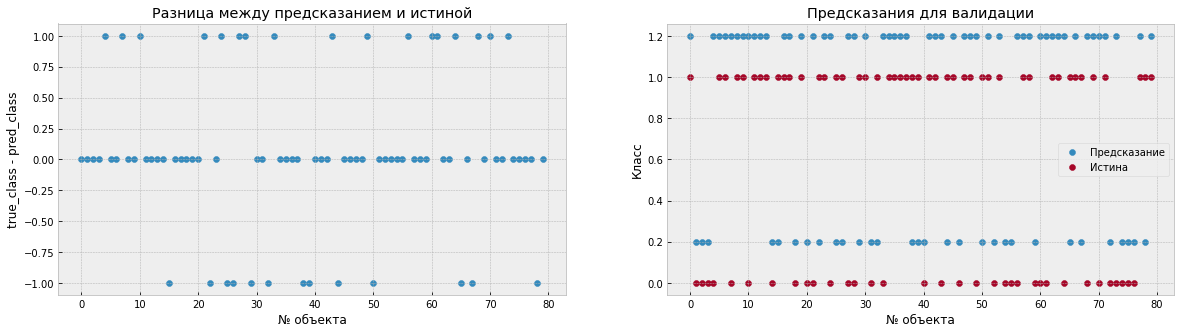

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].scatter([x for x in range(len(answer))], answer - data.iloc[val_idx[f"target_0"]]["target"])
ax[0].set_title("Разница между предсказанием и истиной")
ax[0].set_xlabel("№ объекта")
ax[0].set_ylabel("true_class - pred_class")
ax[1].scatter([x for x in range(len(answer))], answer + 0.2, label="Предсказание")
ax[1].scatter([x for x in range(len(answer))], data.iloc[val_idx[f"target_0"]]["target"], label="Истина")
ax[1].legend(loc="best")
ax[1].set_title("Предсказания для валидации")
ax[1].set_xlabel("№ объекта")
ax[1].set_ylabel("Класс")
plt.show()

## Влияние признаков

In [29]:
import shap

#для shap надо бы сетку plt отключить
plt.style.use("default")

In [47]:
explainer = shap.Explainer(best_models[f"target_0"])
shap_values = explainer(data.drop(columns=targets + ["Наименование ДП"]).reindex(columns = sorted(list(data.columns))))

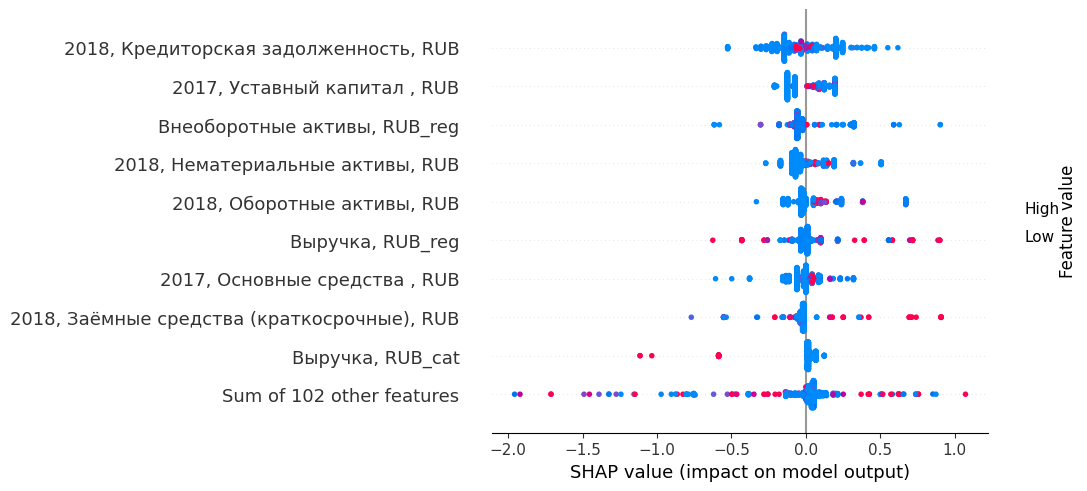

In [48]:
shap.plots.beeswarm(shap_values)

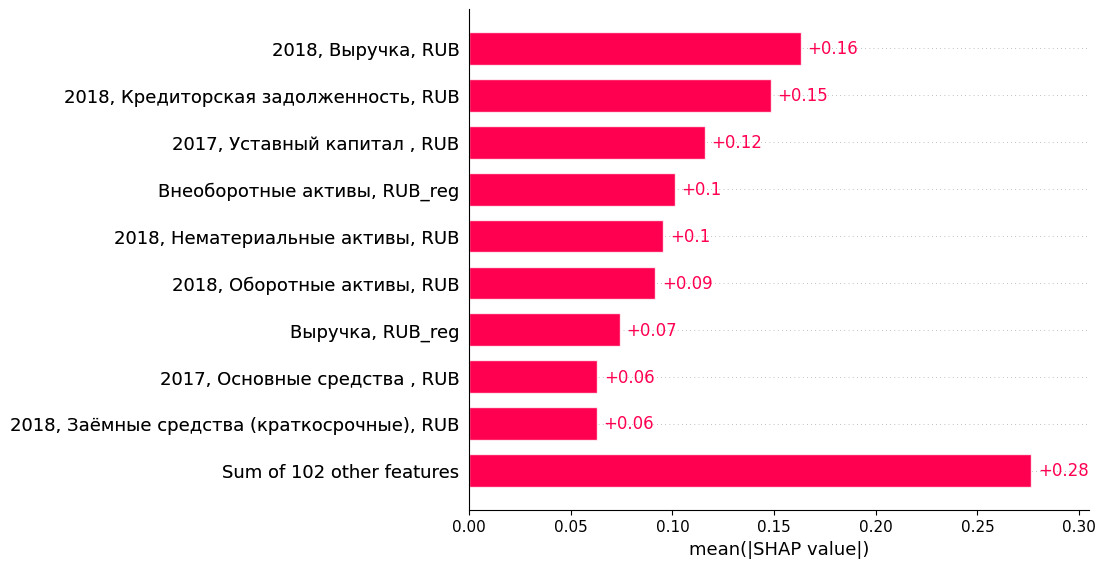

In [49]:
shap.plots.bar(shap_values)

# Рекомендательная система

Основная идея - сделать систему, которая дает лицу принимающему решение по контрагенту быструю сводку из предсказания и исторических данных

In [30]:
best_models = {}
for i in (0, 5, 10):
    best_models[f"target_{i}"] = CatBoostClassifier().load_model(f"./models/cb_2019_{i}")
    print(f"Модлеь для порога {i} загружена")

Модлеь для порога 0 загружена
Модлеь для порога 5 загружена
Модлеь для порога 10 загружена


In [149]:
import os

class Recomend:
    
    __slots__ = ("models", "shap_values", "targets", "prev_data", "addition_data", "historical_data")
    def __init__(self, model_path, prev_data, historical_data):
        self.models = {}
        self.shap_values = {}
        self.prev_data = prev_data
        self.historical_data = historical_data
        
        for i in os.listdir(model_path):
            if i != ".ipynb_checkpoints": #TODO do norm
                self.models[i] = CatBoostClassifier().load_model(model_path + i)
        
        self.targets = [
            "Макс. ПДЗ за 2019 год, дней", "Сред. ПДЗ за 2019 год, дней", "Кол-во просрочек свыше 5-ти дней за 2019 год, шт.", 
            "Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.", "Кол-во раз ПДЗ за 2019 год, шт."
        ]
        
        self.addition_data = {
            "metallurgical_production_index" : [99.7, 100.1, 101.7],
            "manufacture_of_steel_pipes" : [95.3, 106.3, 103.2],
            "manufacture_of_other_steel_products" : [104.9, 106.1, 102.7],
            "final_metal_products" : [112.7, 103.4, 101.3],
            "machines_products" : [101.5, 106.8, 99.4],
            "usd_rub_init" : [72.92, 59.89, 57.04],
            "usd_rub_min" : [60.27, 55.84, 57.67],
            "usd_rub_max" : [83.59, 60.75, 69.97]
        }

    
    def _regressor_on_feature(self, inner_data: pd.DataFrame, cols: list, new_name: str, suffix: str="_reg", cat_suffix: str="_cat") -> pd.DataFrame:
        """Построение регрессии на основе секции выше: если есть строки со всеми нулями - добавление категориального признака, построение тренда"""
    
        triplets = inner_data[(inner_data[cols[0]] == 0) & (inner_data[cols[1]] == 0) & (inner_data[cols[2]] == 0)]
        inner_data[new_name + cat_suffix] = 0
        inner_data.at[triplets.index, new_name + cat_suffix] = 1
        inner_data[new_name + cat_suffix] = inner_data[new_name + cat_suffix].astype(int)
        
        inner_data[new_name + suffix] = 0
        for idx in inner_data[(inner_data[cols[0]] != 0) & (inner_data[cols[1]] != 0) & (inner_data[cols[2]] != 0)].index:
            inner_data.at[idx, new_name + suffix] = trendline([inner_data.loc[idx, cols[0]], inner_data.loc[idx, cols[1]], inner_data.loc[idx, cols[2]]])
        return inner_data
    
    def _preprocess_features(self, inner_data):
                
        ts_features = {}
        for feature in inner_data.columns:
            if feature[:2] == "20" and feature[6:] not in ts_features.keys():
                ts_features[feature[6:]] = []

        for feature in inner_data.columns:
            if feature[6:] in ts_features.keys():
                ts_features[feature[6:]].append(feature[:4])

        # Сортировка, если перепутана темпоральность
        for key, value in ts_features.items():
            ts_features[key] = sort(value)
        
        for idx, (key, value) in enumerate(ts_features.items()):
            inner_data = self._regressor_on_feature(inner_data, [f"{value[0]}, {key}", f"{value[1]}, {key}", f"{value[2]}, {key}"], key)

        inner_data = inner_data.reindex(columns=sorted(list(inner_data.columns)))
        inner_data = inner_data.drop(columns=self.targets + ["Наименование ДП"]).reindex(columns = sorted(list(data.columns)))
        for key, value in self.addition_data.items():
            for year, item_year in enumerate(value, start=2016):
                inner_data[key + "_" + str(year)] = item_year
        return inner_data
    
    def _aggregate_models(self, predictions):
        
        best_k = ""
        best_v = 0
        class_mark = 0
        
        for k, v in predictions.items():
            temp_class = np.argmax(v[0])
            temp_value = np.max(v[0])
            if temp_value > best_v:
                best_v = temp_value
                best_k = k
                class_mark = temp_class
        
        return class_mark, best_k, best_v
    
    def _get_percent(self, data_row, feature, sign_of_shap, sub_idx):
        subset = self.historical_data.drop(index=[sub_idx])
        if sign_of_shap:
            subset = subset[subset[feature] > data_row[feature].values[0]]
            answ = len(subset[subset["Макс. ПДЗ за 2019 год, дней"] > 0]) / len(self.historical_data) * 100
            return answ
        else:
            subset = subset[subset[feature] < data_row[feature].values[0]]
            answ = len(subset[subset["Макс. ПДЗ за 2019 год, дней"] > 0]) / len(self.historical_data) * 100
            return answ
            
    
    def _get_statistic_over_history(self, shap_values, data_row, sub_idx):
        detail_report = ""
        data_cols = list(data_row.columns)
        answ = pd.DataFrame(columns=["Признак", "Вклад", "Аналогичные"])
        for idx, value in enumerate(shap_values[0].values):
            if value != 0:
                answ = answ.append({
                    "Признак": data_cols[idx],
                    "Вклад": value,
                    "Аналогичные": f"{self._get_percent(data_row, data_cols[idx], value < 0, sub_idx):.1f}"
                }, ignore_index=True)
        answ = answ.sort_values(by="Вклад", ascending=True)
        answ = answ.reset_index(drop=True)
        answ = answ.iloc[:5]
        print(answ)
    
    def explain(self, data_row, idx):
        """Загрузка показатель из начального датасета"""
        agent_id = int(data_row["Наименование ДП"].values[0])
        data_row = self._preprocess_features(data_row)
        predictions = {}
        for k, m in self.models.items():
            explainer = shap.Explainer(m)
            self.shap_values[k] = explainer(data_row)
            predictions[k] = m.predict_proba(data_row)
        class_mark, best_k, best_v = self._aggregate_models(predictions)
        answ = f"Контрагент {agent_id} классифицирован как "
        if class_mark == 0:
            answ += f"\'контрагент с низким риском\' [{best_v * 100:.1f}%]\n"
        else:
            answ += f"\'контрагент с высоким риском\' [{best_v * 100:.1f}%]\n"
        answ += "Наиболее значимые параметры контрагента, повлиявшие на решение:"
        print(answ)
        shap.plots.waterfall(self.shap_values[best_k][0])
        
        detail = f"\n\n" + "=" * 5 + " Сводка по наиболее значимым признакам" + "=" * 5 + "\n"
        detail += "[предполагается наличие исторических данных]\n[\'Аналогичные\' контрагенты - процент, допустивших ПДЗ по данному критерию (выше/ниже) в зависимости от \'Вклада\']\n"
        print(detail)
        self._get_statistic_over_history(self.shap_values[best_k], data_row, idx)
        return

In [150]:
# Загрузка отдельного датасета для проверки корректности работы класса
new_data = pd.read_csv("./data/agents2019.csv")
new_data = new_data.drop(columns=["Unnamed: 0"])

In [151]:
a = Recomend("./models/", new_data, data) # Инициализация

Введите индекс строки для построения отчета: 500


Контрагент 500 классифицирован как 'контрагент с высоким риском' [84.4%]
Наиболее значимые параметры контрагента, повлиявшие на решение:


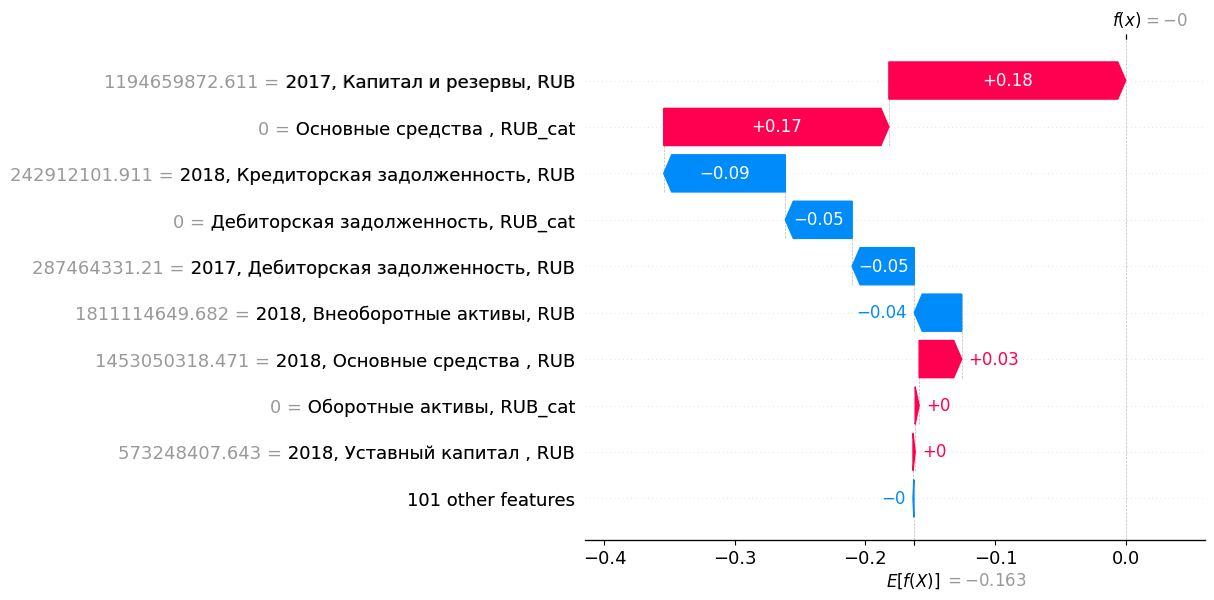



===== Сводка по наиболее значимым признакам=====
[предполагается наличие исторических данных]
['Аналогичные' контрагенты - процент, допустивших ПДЗ по данному критерию (выше/ниже) в зависимости от 'Вклада']

                                 Признак     Вклад Аналогичные
0  2018, Кредиторская задолженность, RUB -0.093322        21.8
1     Дебиторская задолженность, RUB_cat -0.051280         1.1
2   2017, Дебиторская задолженность, RUB -0.047656        16.2
3         2018, Внеоборотные активы, RUB -0.036394         9.4
4            2018, Оборотные активы, RUB -0.000654        19.4


In [155]:
global_index = int(input("Введите индекс строки для построения отчета:"))
a.explain(pd.DataFrame(pd.DataFrame(new_data.iloc[global_index]).T), global_index) # Получение объяснений (индекс для исключения из рассмотрения строки - для примера нет данных иных)

**истинное значение**

In [156]:
new_data.iloc[global_index][[
    "Макс. ПДЗ за 2019 год, дней", "Сред. ПДЗ за 2019 год, дней", "Кол-во просрочек свыше 5-ти дней за 2019 год, шт.", 
    "Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.", "Кол-во раз ПДЗ за 2019 год, шт."
]].astype(int)

Макс. ПДЗ за 2019 год, дней                                9
Сред. ПДЗ за 2019 год, дней                                6
Кол-во просрочек свыше 5-ти дней за 2019 год, шт.          2
Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.    3645228
Кол-во раз ПДЗ за 2019 год, шт.                            4
Name: 500, dtype: int32